In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertilzer-recommender/fertilizer_recommendation_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [5]:
data=pd.read_csv("/kaggle/input/fertilzer-recommender/fertilizer_recommendation_dataset.csv")
data.head()

,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer,Remark
0,50.179845,0.725893,205.600816,6.227358,66.701872,76.963560,96.429065,0.496300,Loamy Soil,rice,Compost,Enhances organic matter and improves soil stru...
1,21.633318,0.721958,306.081601,7.173131,71.583316,163.057636,148.128347,1.234242,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
2,23.060964,0.685751,259.336414,7.380793,75.709830,62.091508,80.308971,1.795650,Peaty Soil,rice,Water Retaining Fertilizer,Improves water retention in dry soils. Prefer ...
3,26.241975,0.755095,212.703513,6.883367,78.033687,151.012521,153.005712,1.517556,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
4,21.490157,0.730672,268.786767,7.578760,71.765123,66.257371,97.000886,1.782985,Peaty Soil,rice,Organic Fertilizer,"Enhances fertility naturally, ideal for peaty ..."


In [11]:
print(data["Fertilizer"].isnull())
data.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3095    False
3096    False
3097    False
3098    False
3099    False
Name: Fertilizer, Length: 3100, dtype: bool


,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer,Remark
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3095,False,False,False,False,False,False,False,False,False,False,False,False
3096,False,False,False,False,False,False,False,False,False,False,False,False
3097,False,False,False,False,False,False,False,False,False,False,False,False
3098,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data["Fertilizer"].value_counts()

Fertilizer
DAP                           1054
Water Retaining Fertilizer     675
Compost                        375
Muriate of Potash              326
Lime                           181
Balanced NPK Fertilizer        157
Urea                           154
Organic Fertilizer              95
Gypsum                          52
General Purpose Fertilizer      31
Name: count, dtype: int64

In [14]:
data.shape
data.isnull().sum()

Temperature    0
Moisture       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
Fertilizer     0
Remark         0
dtype: int64

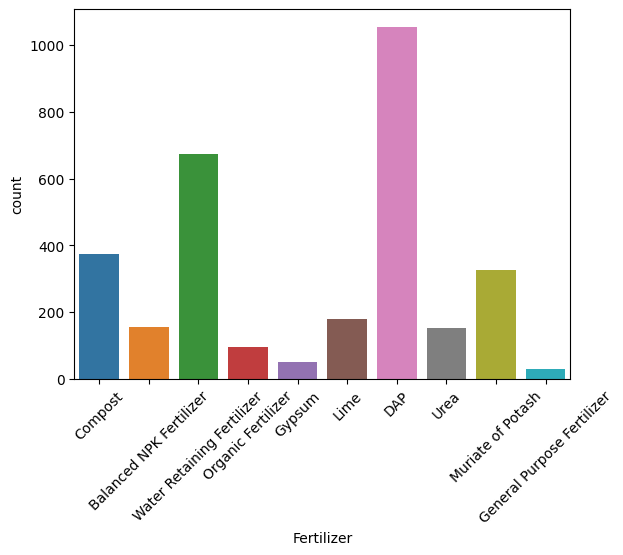

In [16]:
sns.countplot(data=data, x='Fertilizer')
plt.xticks(rotation=45)
plt.show()

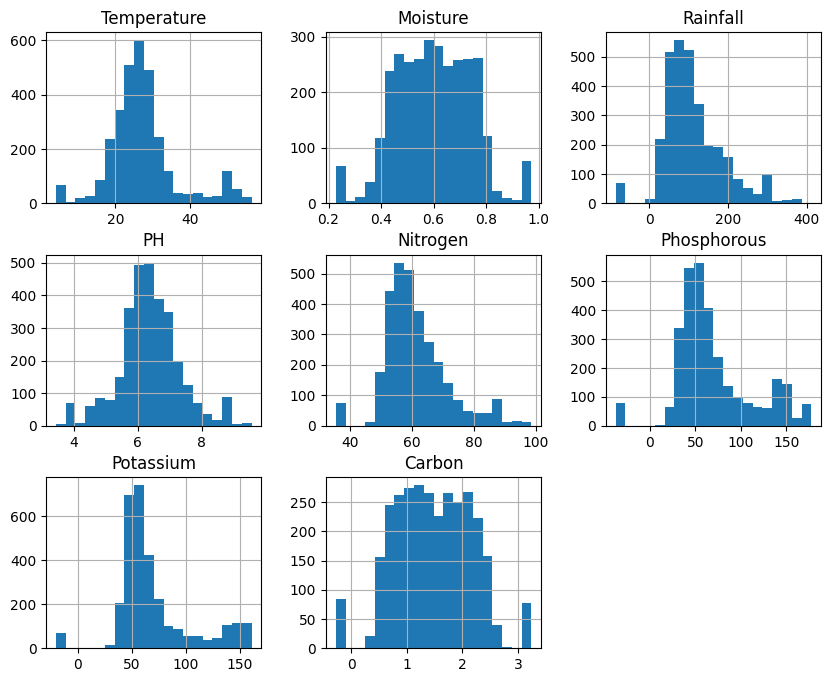

In [21]:
data.hist(bins=20, figsize=(10,8))
plt.show()


<Axes: >

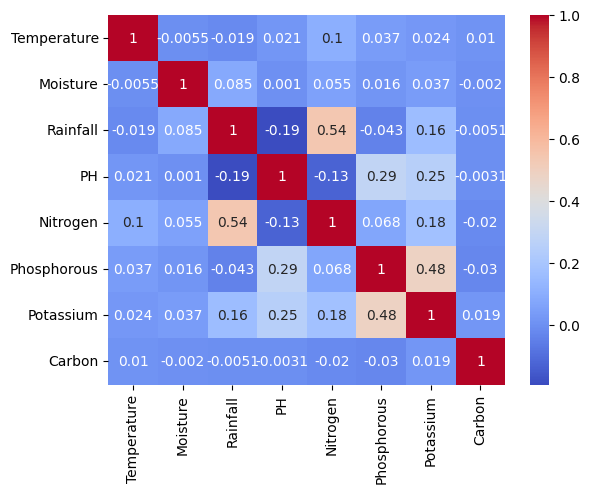

In [24]:
corr = data[["Temperature","Moisture","Rainfall","PH","Nitrogen","Phosphorous","Potassium","Carbon"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [28]:
scaler=StandardScaler()
le=LabelEncoder()
X=data.drop(["Fertilizer"],axis=1)
y=data["Fertilizer"]

In [30]:
y_encoded = le.fit_transform(y)

In [32]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

In [33]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Encode categorical columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.head()


,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
1173,-1.309553,0.702281,-1.031131,-2.582336,-1.373444,-0.933613,-0.671134,0.302024,0,12
168,0.577416,-1.641760,0.534848,0.451647,0.202427,0.034796,0.516573,-0.986850,3,30
2589,0.562369,-1.016921,-0.451616,-1.006325,-0.286855,-0.353735,-0.679529,0.325463,0,22
1011,0.536104,-0.690427,-0.078968,-0.353484,0.194043,-0.202039,-0.273736,-0.696953,0,6
2978,-0.390419,-1.269021,0.301970,-0.466857,0.257277,-0.264785,-0.288060,-2.513485,0,27


In [39]:
y_train.head()
from sklearn.tree import export_graphviz
import graphviz

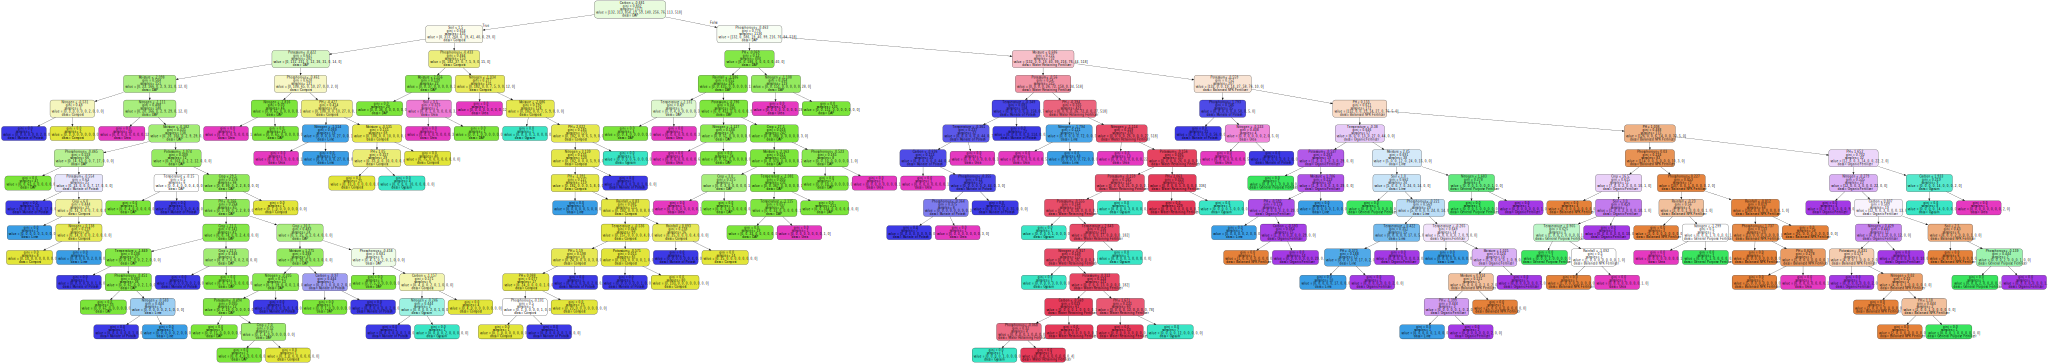

In [41]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
estimator = model.estimators_[0]

# Export the tree as a DOT file
dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=X_train.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render tree
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # saves as PDF or PNG
graph

In [43]:
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(score)
print(report)


0.9870967741935484
                            precision    recall  f1-score   support

   Balanced NPK Fertilizer       1.00      1.00      1.00        32
                   Compost       0.99      0.99      0.99        84
                       DAP       0.99      1.00      0.99       206
General Purpose Fertilizer       1.00      1.00      1.00         7
                    Gypsum       1.00      0.67      0.80         6
                      Lime       0.97      0.97      0.97        39
         Muriate of Potash       0.99      1.00      0.99        66
        Organic Fertilizer       1.00      0.94      0.97        18
                      Urea       1.00      0.94      0.97        34
Water Retaining Fertilizer       0.98      0.99      0.99       128

                  accuracy                           0.99       620
                 macro avg       0.99      0.95      0.97       620
              weighted avg       0.99      0.99      0.99       620



[[ 32   0   0   0   0   0   0   0   0   0]
 [  0  83   0   0   0   0   0   0   0   1]
 [  0   0 206   0   0   0   0   0   0   0]
 [  0   0   0   7   0   0   0   0   0   0]
 [  0   1   0   0   4   0   0   0   0   1]
 [  0   0   1   0   0  38   0   0   0   0]
 [  0   0   0   0   0   0  66   0   0   0]
 [  0   0   0   0   0   1   0  17   0   0]
 [  0   0   1   0   0   0   1   0  32   0]
 [  0   0   1   0   0   0   0   0   0 127]]


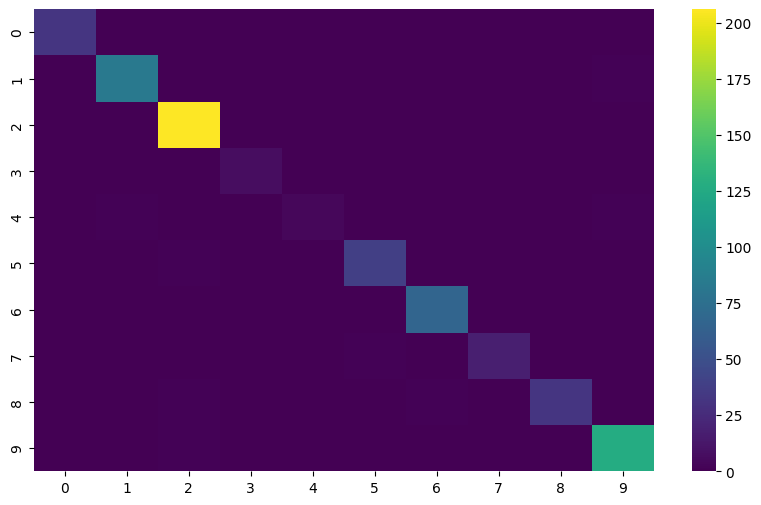

In [44]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
plt.figure(figsize=(10,6))
sns.heatmap(matrix,cmap='viridis')
plt.show()

In [48]:
import pickle

# Save model to file
with open("fertilizer.pkl", "wb") as f:
    pickle.dump(model, f)  


In [49]:
import os
print(os.listdir())


['random_forest_tree.pdf', 'fertilizer.pkl', 'crop_model.pkl', 'random_forest_tree', '.virtual_documents']
